In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading a dataset which is related to Diwali Sales


In [77]:
df=pd.read_csv("Diwali Sales Data.csv",encoding='unicode_escape')

In [78]:
print("Top 5 revords of DataFrame:\n")
df.head(5)

Top 5 revords of DataFrame:



,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# 1: Data Preprocessing and cleaning

In [79]:
print(df.isnull().sum())

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64


(a) Drop column Status and unnamed beacuse there is no values

In [80]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [81]:
print(df.isnull().sum())
print(df.shape)

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64
(11251, 13)


(b) Drop those record who have null values.

In [82]:
print("No of rows and columns before deletion of null\n",df.shape)

No of rows and columns before deletion of null
 (11251, 13)


In [83]:
df.dropna(inplace=True)

In [84]:
print("No of rows and columns after deletion of null\n",df.shape)
df.isnull().sum()

No of rows and columns after deletion of null
 (11239, 13)


User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

# 2. Data Manipulations

### Find the summary statistics of Numeric Columns

In [85]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


### Find the total No of order amd amount as per gender

In [86]:
total_per_gender=df.groupby('Gender').agg(
            Total_Order=('Orders','sum'),
            Total_Amount=('Amount','sum')
            )
total_per_gender['Total_Amount']=(total_per_gender['Total_Amount']/1000000).round(4)

print(f"Total no of order and amount (in million) as per gender:\n{total_per_gender}")

Total no of order and amount (in million) as per gender:
        Total_Order  Total_Amount
Gender                           
F             19548       74.3359
M              8433       31.9133


### Find the total No of order and amount as per state

In [98]:
total_per_state=df.groupby('State').agg(
    Total_Order=('Orders','sum'),
    Total_Amount=('Amount','sum')
)

total_per_state = total_per_state.reset_index()

total_per_state['Total_Amount']=(total_per_state['Total_Amount']/1000000).round(4)

print(f"Total no of order and amount (in million) as per state:\n{total_per_state}")

Total no of order and amount (in million) as per state:
               State  Total_Order  Total_Amount
0     Andhra Pradesh         2051        8.0371
1              Bihar         1062        4.0228
2              Delhi         2740       11.6038
3            Gujarat         1066        3.9461
4            Haryana         1109        4.2202
5   Himachal Pradesh         1568        4.9634
6          Jharkhand          953        3.0265
7          Karnataka         3240       13.5235
8             Kerala         1137        3.8945
9     Madhya Pradesh         2252        8.1011
10       Maharashtra         3810       14.4275
11            Punjab          495        1.5258
12         Rajasthan          555        1.9094
13         Telangana          312        1.1515
14     Uttar Pradesh         4807       19.3750
15       Uttarakhand          824        2.5209


In [100]:
total_per_state.to_csv('diwali_sales_per_state.csv',index=False)

### Find the total No of order and amount as per age group

In [88]:
total_per_age_group=df.groupby('Age Group').agg(
    Total_Order=('Orders','sum'),
    Total_Amount=('Amount','sum')
)
total_per_age_group['Total_Amount']=(total_per_age_group['Total_Amount']/1000000).round(4)

print(f"Total no of order and amount (in million) as per state\n{total_per_age_group}")

Total no of order and amount (in million) as per state
           Total_Order  Total_Amount
Age Group                           
0-17               690        2.6997
18-25             4650       17.2407
26-35            11395       42.6134
36-45             5687       22.1450
46-50             2371        9.2078
51-55             2112        8.2615
55+               1076        4.0810


### Find the total No of order and amount as per zone

In [89]:
total_per_zone=df.groupby('Zone').agg(
    Total_Order=('Orders','sum'),
    Total_Amount=('Amount','sum')
)
total_per_zone['Total_Amount']=(total_per_zone['Total_Amount']/1000000).round(4)

print(f"Total no of order and amount (in million) as per zone:\n{total_per_zone}")

Total no of order and amount (in million) as per zone:
          Total_Order  Total_Amount
Zone                               
Central         10623       41.6009
Eastern          2015        7.0492
Northern         3727       12.6188
Southern         6740       26.6067
Western          4876       18.3736


### Find the total No of order and amount as per occupation

In [90]:
total_per_occupation=df.groupby('Occupation').agg(
    Total_Order=('Orders','sum'),
    Total_Amount=('Amount','sum')
)
total_per_occupation['Total_Amount']=(total_per_occupation['Total_Amount']/1000000).round(4)

print(f"Total no of order and amount (in million) as per occupation:\n{total_per_occupation}")

Total no of order and amount (in million) as per occupation:
                 Total_Order  Total_Amount
Occupation                                
Agriculture              722        2.5931
Automobile              1371        5.3686
Aviation                3215       12.6023
Banking                 2817       10.7706
Chemical                1309        5.2974
Construction            1025        3.5975
Food Processing         1073        4.0707
Govt                    2155        8.5172
Healthcare              3455       13.0346
Hospitality             1739        6.3764
IT Sector               3997       14.7551
Lawyer                  1344        4.9817
Media                   1596        6.2958
Retail                  1270        4.7832
Textile                  893        3.2050


# 3: Data Visualization

### (a) Create a bar graph for total order and amount as per gender 

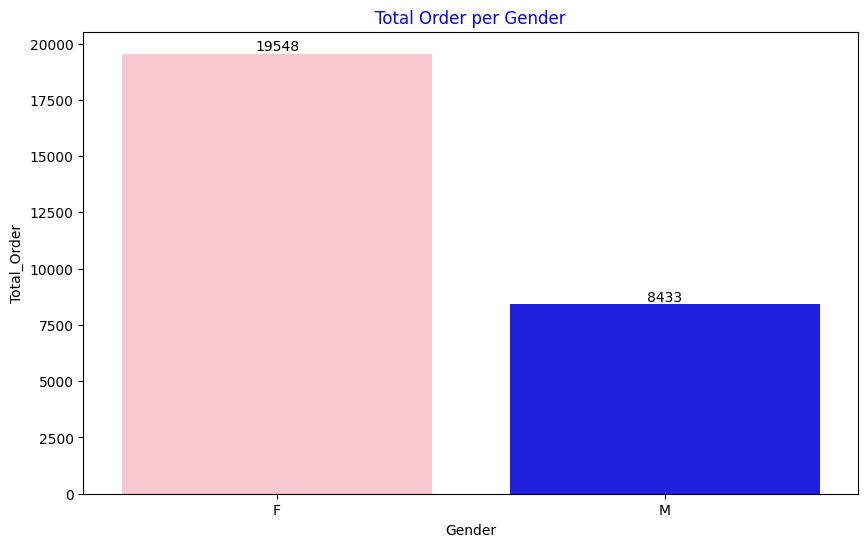

In [91]:
plt.figure(figsize=(10, 6))

bar_order_gender=sns.barplot(x='Gender',y='Total_Order',data=total_per_gender,hue='Gender',palette={'F':'Pink','M':'Blue'})

for bars in bar_order_gender.containers:
    bar_order_gender.bar_label(bars)

plt.title('Total Order per Gender',color='blue')
plt.savefig('total_orders_per_gender.png', bbox_inches='tight')
plt.show()

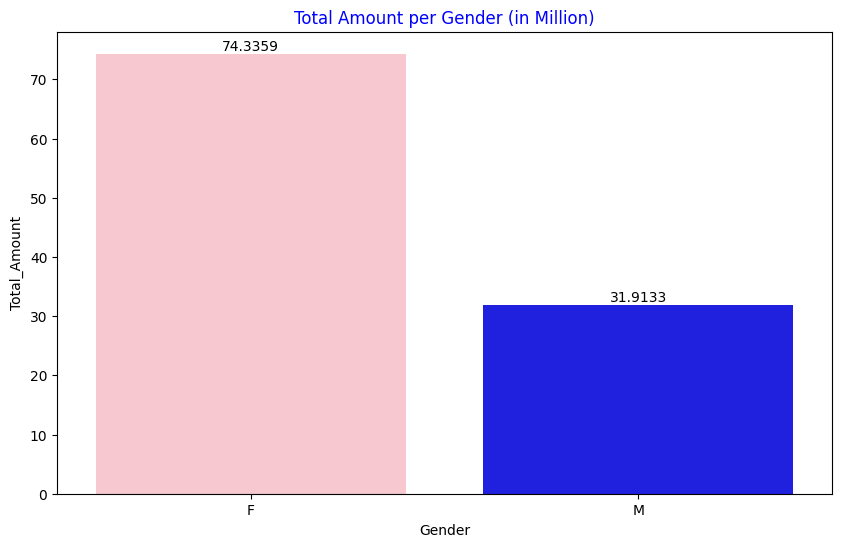

In [92]:
plt.figure(figsize=(10, 6))
bar_order_gender=sns.barplot(x='Gender',y='Total_Amount',data=total_per_gender,hue='Gender',palette={'F':'Pink','M':'Blue'})


for bars in bar_order_gender.containers:
    bar_order_gender.bar_label(bars)


plt.title('Total Amount per Gender (in Million)',color='blue')

plt.savefig('total_amounts_per_gender.png', bbox_inches='tight')

plt.show()

### (b) Create a bar graph for total order and amount as per age group.

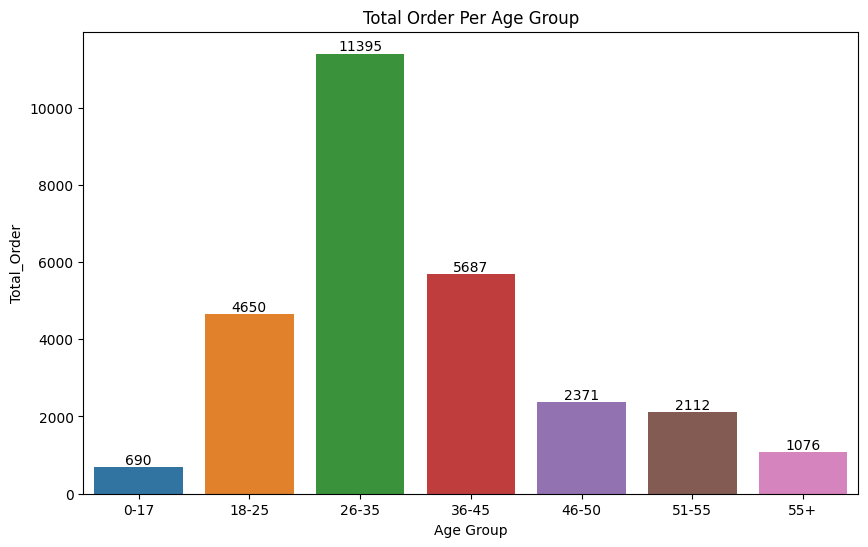

In [93]:
plt.figure(figsize=(10, 6))
bar_order_age_group=sns.barplot(x='Age Group',y='Total_Order',data=total_per_age_group,hue='Age Group')

for bars in bar_order_age_group.containers:
    bar_order_age_group.bar_label(bars)

plt.title('Total Order Per Age Group')

plt.savefig('total_order_per_age_group.png', bbox_inches='tight')

plt.show()

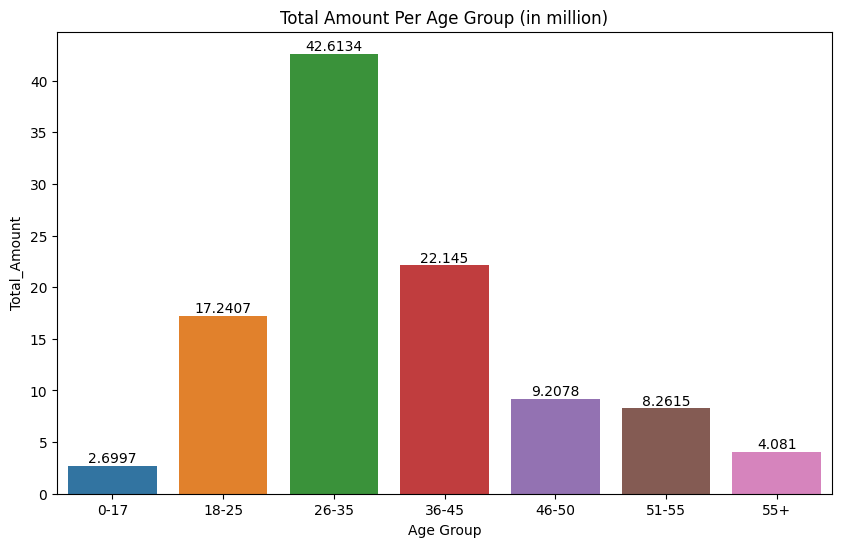

In [94]:
plt.figure(figsize=(10, 6))

bar_amount_age_group=sns.barplot(x='Age Group',y='Total_Amount',data=total_per_age_group,hue='Age Group')

for bars in bar_amount_age_group.containers:
    bar_amount_age_group.bar_label(bars)

plt.title('Total Amount Per Age Group (in million)')

plt.savefig('total_amounts_per_age_group.png', bbox_inches='tight')
plt.show()

### (c) Create a bar graph for total order and amount as per zone

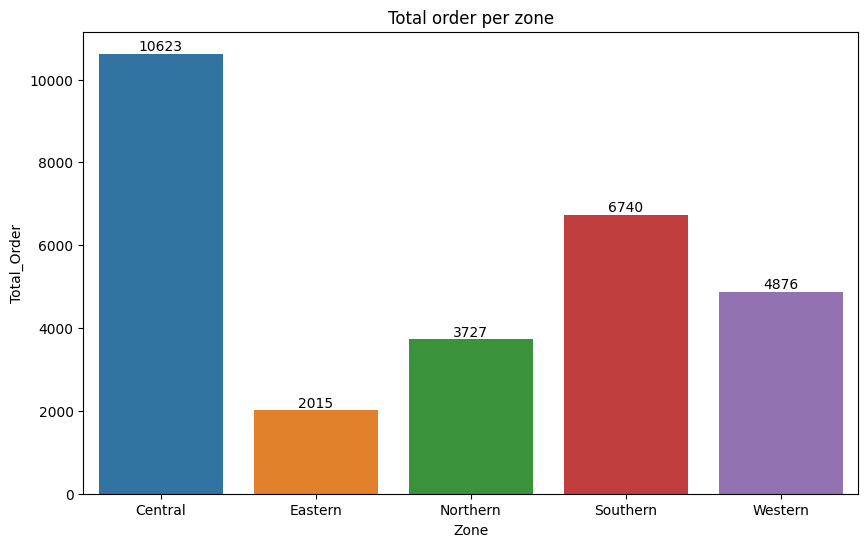

In [95]:
plt.figure(figsize=(10, 6))

bar_order_zone=sns.barplot(x='Zone',y='Total_Order',data=total_per_zone,hue='Zone')
plt.title('Total order per zone')

for bars in bar_order_zone.containers:
    bar_order_zone.bar_label(bars)
    
plt.savefig('total_orders_per_zone.png', bbox_inches='tight')
    
plt.show()

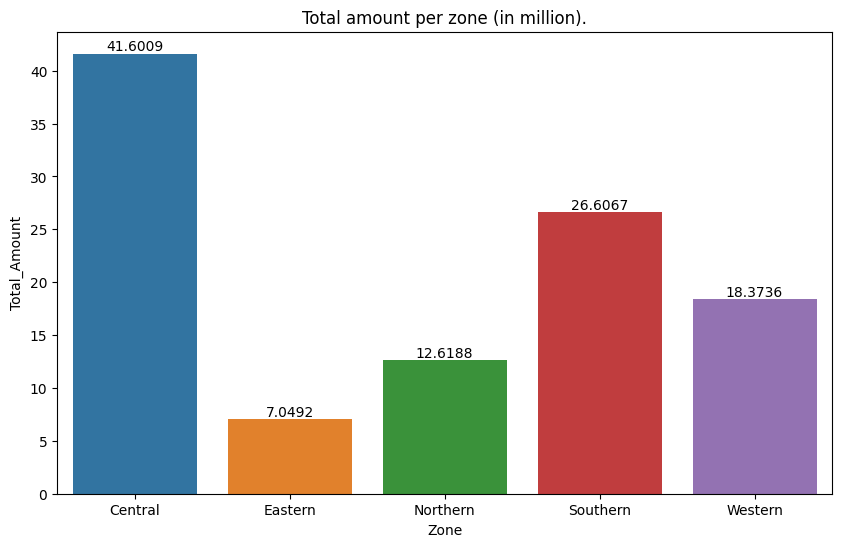

In [96]:
plt.figure(figsize=(10, 6))

bar_amount_zone=sns.barplot(x='Zone',y='Total_Amount',data=total_per_zone,hue='Zone')


for bars in bar_amount_zone.containers:
    bar_amount_zone.bar_label(bars)

plt.title('Total amount per zone (in million).')
plt.savefig('total_amounts_per_zone.png', bbox_inches='tight')
plt.show()